# Instalar os programas e montar o google Drive

In [ ]:
!pip install pyabf
!pip install efel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.6/644.6 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 11.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


INFORMAR O CAMINHO PARA A PASTA ONDE ESTAO OS ARQUIVOS A SEREM ANALISADOS:


 OBS.: recomendo deixar este arquivo_de_codigo no msm local da pasta dos arquivos

In [ ]:
cd '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/'

/content/drive/.shortcut-targets-by-id/1lMJs6OOxMh_gEFC-2der6SB0a4NRFsG3/Laboratorio Neurofisiologia/Projeto Anoxia


In [ ]:
ls -li 'P14-P17'

total 262
601 -rw------- 1 root root 87602 Sep  4 01:23  4-pulses_P15_CT_HPC.xlsx
593 drwx------ 2 root root  4096 Apr 29 11:06 'CPT-8 100 nM'/
598 drwx------ 2 root root  4096 Aug 30 18:31 'CSG_A2AR_agonist '/
594 drwx------ 2 root root  4096 Aug 14 18:13 'EPSCs espontâneos'/
595 drwx------ 2 root root  4096 Aug 18 01:33  HFS/
603 -rw------- 1 root root 46464 Sep  7 20:29  Input-Output_HPC_P15_ANOXIA.xlsx
602 -rw------- 1 root root 34726 Sep  4 04:23  Input-Output_HPC_P15_CONTROLE.xlsx
599 drwx------ 2 root root  4096 Sep  3 00:17 'IPSCs - CsCl'/
597 drwx------ 2 root root  4096 Aug 22 11:43  miniEPSCs/
600 -rw------- 1 root root 65813 Sep  3 17:42  Pairerd-Pulse_Paired-Pulse_P15_CONTROLE.xlsx
592 drwx------ 2 root root  4096 Apr 29 10:55 'PA- RAMP- PPS - GF'/
596 drwx------ 2 root root  4096 Aug 19 16:23 'Theta Burst Stimulation'/


In [ ]:
import os
import efel
import pyabf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series

In [ ]:
rootFolder = '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/'

In [ ]:
rootFolder_controle_CPF = '/content/drive/MyDrive/Projeto Serotonina 2/'

In [ ]:
# Definir nome do protocolo de interesse
protocolo = "GAP"

cellnames = []
groupnames = []
groupnames2 = []
outliers = ['24722000.abf']

for idade in ['P14-P17']: # , 'P24-P27'

  g1 = rootFolder + idade + '/PA- RAMP- PPS - GF'
  if '.' not in g1:
    print(idade)

    for g2 in os.listdir(g1):
      if '.' not in g2:
        print('\t',g2)

        for g3 in os.listdir(g1+'/'+g2):
          if '.' not in g3:
            print('\t\t',g3)

            # -------------------------------------------------------------------------------------------------------------------------- #

            cellnumber = 0
            if 'Cell 01' in os.listdir(g1+'/'+g2+'/'+g3):

              for g4 in os.listdir(g1+'/'+g2+'/'+g3):
                if 'ell' in g4 and '.' not in g4:

                  if 'ANOXIA' in g2 + g3 or 'anoxia' in g2 + g3:
                    if 'CPF' in g2 + g3:
                      grupo = 'CPF_ANOXIA'
                    else:
                      grupo = 'HPC_ANOXIA'

                  elif 'CONTROLE' in g2 + g3 or 'Controle' in g2 + g3:
                    if 'CPF' in g2 + g3:
                      grupo = 'CPF_CONTROLE'
                    else:
                      grupo = 'HPC_CONTROLE'

                  print('\t\t\t',g4, grupo)

                  # -------------------------------------------------------------------------------------------------------------------------- #

                  for g5 in os.listdir(g1+'/'+g2+'/'+g3+'/'+g4):
                    if '.abf' in g5 and g5 not in outliers:

                      firstREO = 0

                      cell = g4

                      filename = g5

                      if 'HPC' in grupo and idade+'_'+grupo+'_'+cell not in groupnames2:

                          abf = pyabf.ABF(g1+'/'+g2+'/'+g3+'/'+cell+'/'+filename)

                          fs = abf.dataRate

                          if protocolo in abf.protocol and 'HPC' in grupo and idade+'_'+grupo+'_'+cell not in groupnames2:
                              ############################################
                              # Save Data and plot
                              ############################################

                              print(abf.protocol)
                              print(abf.sweepList)
                              print(grupo+'/'+cell+'/'+filename, abf.protocol, abf.sweepList)
                              # print(abf)


                              cellnumber = cellnumber + 1
                              celname = 'Cell ' + str(cellnumber)

                              for i in abf.sweepList: # GUI>> modf p dados do gui (muitos steps)
                                  abf.setSweep(i, channel=0)
                                  time = abf.sweepX
                                  voltage = abf.sweepY
                                  cellnames.append(celname)
                                  groupnames.append(g1+'/'+g2+'/'+g3+'/'+cell+'/'+filename)
                                  groupnames2.append(idade+'_'+grupo+'_'+cell)





P14-P17
	 ANOXIA
		 CPF
			 Cell 01 CPF_ANOXIA
			 Cell 02 CPF_ANOXIA
			 Cell 03 CPF_ANOXIA
			 Cell 04 CPF_ANOXIA
			 Cell 05 CPF_ANOXIA
			 Cell 06 CPF_ANOXIA
			 Cell 08 CPF_ANOXIA
			 Cell 09 CPF_ANOXIA
			 Cell 10 CPF_ANOXIA
			 Cell 11 CPF_ANOXIA
			 Cell 07 CPF_ANOXIA
		 HPC
			 Cell 01 HPC_ANOXIA
			 Cell 02 HPC_ANOXIA
GAP-Free_5 min
[0]
HPC_ANOXIA/Cell 02/24426062.abf GAP-Free_5 min [0]
			 Cell 03 HPC_ANOXIA
GAP-Free_5 min
[0]
HPC_ANOXIA/Cell 03/24427015.abf GAP-Free_5 min [0]
			 Cell 04 HPC_ANOXIA
GAP-Free_5 min
[0]
HPC_ANOXIA/Cell 04/24427031.abf GAP-Free_5 min [0]
			 Cell 05 HPC_ANOXIA
GAP-Free_5 min
[0]
HPC_ANOXIA/Cell 05/24428016.abf GAP-Free_5 min [0]
			 Cell 06 HPC_ANOXIA
			 Cell 07 HPC_ANOXIA
GAP-Free_5 min
[0]
HPC_ANOXIA/Cell 07/24428036.abf GAP-Free_5 min [0]
			 Cell 08 HPC_ANOXIA
			 Cell 09 HPC_ANOXIA
			 Cell 10 HPC_ANOXIA
			 Cell 11 HPC_ANOXIA
GAP-Free_5 min
[0]
HPC_ANOXIA/Cell 11/24429015.abf GAP-Free_5 min [0]
			 Cell 12 HPC_ANOXIA
GAP-Free_5 min
[0]
H

In [ ]:
# find the range for each group
cellnames[0:34:7],groupnames[0:34:7],groupnames2[0:34:7], len(cellnames)

(['Cell 1', 'Cell 8', 'Cell 15', 'Cell 1', 'Cell 8'],
 ['/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 02/24426062.abf',
  '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 14/24612015.abf',
  '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 34/24614073.abf',
  '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/CONTROLE/HPC/Cell 01/24422096.abf',
  '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/CONTROLE/HPC/Cell 13/24609049.abf'],
 ['P14-P17_HPC_ANOXIA_Cell 02',
  'P14-P17_HPC_ANOXIA_Cell 14',
  'P14-P17_HPC_ANOXIA_Cell 34',
  'P14-P17_HPC_CONTROLE_Cell 01',
  'P14-P17_HPC_CONTROLE_Cell 13'],
 34)

In [ ]:
# #------------------------------------------------------------------------------
# # load data
# #------------------------------------------------------------------------------
import os
import pickle
import pyabf
from matplotlib import pyplot as plt
import IPython as ipy
import numpy as np
import pandas as pd

import scipy
from scipy import signal
from scipy.signal import butter, lfilter, freqz, find_peaks
from scipy.optimize import curve_fit

In [ ]:
def load_Voltage(group,abffile,tinitial,tfinal):

    abf = pyabf.ABF(group + '/' + abffile)

    i1, i2 = int(abf.dataRate * tinitial), int(abf.dataRate * tfinal)

    print(abf)
    print('FILE: ' + group + '/' + abffile,' RECORD TIME = %.4f seconds' % abf.sweepX[-1] , ' LOADING = %.4f seconds [ %.4f, %.4f]' % (tfinal-tinitial,tinitial,tfinal))

    # baseline subtraction
    abf.setSweep(0, baseline=[0.0, 5.0])
    outputSignal =  abf.sweepY[i1:i2]
    time = np.linspace(0, np.size(outputSignal)/abf.dataRate, np.size(outputSignal))

    return outputSignal, time, abf.dataRate,abf.sweepLabelX,abf.sweepLabelY

def resample(outputSignal, fs, factordecimate):

    x_resampled = signal.decimate(outputSignal,factordecimate)
    print('size(V_resampled) =',np.size(x_resampled))
    print()
    time2 = np.linspace(0, np.size(outputSignal)/fs, np.size(x_resampled))

    return x_resampled, time2

def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def filterdata(current, fs, showtraces=False):
    # fs = 100000  # Sampling frequency

    # Baseline adjustement (optional)
    # Subtract mean of the full trace
    current_adjusted = current - np.average(current)

    # Option B: Subtract a fixed value
    # current_baseline = current - 10


    # Filter the signal (Bessel filter)
    bessel_pole = 8
    bessel_lowpass = 2000

    # Numerator (b) and denominator (a) polynomials of the Bessel filter
    b, a = signal.bessel(bessel_pole,  # Order of the filter
                        bessel_lowpass,  # Cutoff frequency
                        'low',  # Type of filter
                        analog=False,  # Analog or digital filter
                        norm='phase',
                        fs=fs)

    current_filtered = signal.filtfilt(b, a, current_adjusted)
    if showtraces:
      # Plot the raw trace
      fig = plt.figure(figsize=(12, 6))
      ax1 = fig.add_subplot(211)
      ax1.set_title("Raw data")
      ax1.plot(time, current, linewidth=0.5)

      # Plot the filtered and adjusted trace
      ax2 = fig.add_subplot(212, sharex=ax1, sharey=ax1)
      ax2.set_title("Filtered data")
      ax2.plot(time, current_filtered, color='r', linewidth=0.5)

      # Plotting
      ax1.set_ylabel("Current (pA)")
      ax2.set_ylabel("Current (pA)")
      ax2.set_xlabel("Time (s)")
      fig.tight_layout()

      # Show graph and table
      plt.show()

    # Standard deviation of the adjusted and filtered trace
    std_trace = np.std(current_filtered)
    print("Standard deviation of the trace:", std_trace)

    return current_filtered

def detectionPSP(cellName,abffile,group,current_filtered,fs,tinitial,tfinal,current,showtraces):


    # User inputs at the beginning of the block are easier to read
    signal = current_filtered  # trace after pre-processing (adjusting, filtering, etc.)

    pretrigger_window = (tinitial * fs)/1000  # Pre-event time window in ms
    posttrigger_window = (tfinal * fs)/1000  # Post-event time window in ms

    # Set parameters of the Find peaks function
    thresh_min = 10 # amplitude mínima
    thresh_max = 5000 # amplitude máxima
    thresh_prominence = 33
    thresh_min_width = 1.5 * (fs/1000)
    event_no = 0  # Event viewer: 0 is the first event

    peaks, peaks_dict = find_peaks(-signal,
              height=(thresh_min, thresh_max),  # Min and max thresholds to detect peaks.
              threshold=None,  # Min and max vertical distance to neighboring samples.
              distance=None,  # Min horizontal distance between peaks.
              prominence=thresh_prominence,  # Vertical distance between the peak and lowest contour line.
              width=thresh_min_width,  # Min required width (in bins). E.g. For 10Khz, 10 bins = 1 ms.
              wlen=None,  # Window length to calculate prominence.
              rel_height=0.5,  # Relative height at which the peak width is measured.
              plateau_size=None)


    # Create table with results
    table = pd.DataFrame(columns = ['event', 'peak_position', 'peak_position_s', 'event_start', 'event_end',
                                    'Peak_Amp_pA', 'Width_ms', 'isi_s', 'Area_pA_ms',
                                    'tau_exp', 'rise_half_amp_ms', 'decay_half_amp_ms'])

    table.event = np.arange(1, len(peaks) + 1)
    table.peak_position = peaks
    table.peak_position_s = peaks / fs  # Divided by fs to get s
    table.event_start = peaks_dict['left_ips'] - pretrigger_window
    table.event_end = peaks_dict['right_ips'] + posttrigger_window
    table.Peak_Amp_pA = peaks_dict['peak_heights']  # height parameter is needed
    table.Width_ms = peaks_dict['widths']/(fs/1000) # Width (ms) at half-height

    # Optional parameters (remember to add the column names to the table)
    table.rise_half_amp_ms = (peaks - peaks_dict['left_ips'])/(fs/1000)
    table.decay_half_amp_ms = (peaks_dict['right_ips'] - peaks)/(fs/1000)

    # Calculations based on the parameters above
    # table.inst_freq = np.append((1 / (np.array(table.peak_position[1:]) -
    #                                   np.array(peaks_dict['left_ips'][:-1])) * fs), 'nan')
    table.isi_s = np.diff(peaks, axis=0, prepend=peaks[0]) / fs

    for i, event in table.iterrows():

        # Area
        individual_event = signal[int(event.event_start) : int(event.event_end)]
        table.loc[i, 'Area_pA_ms'] = abs(np.round(individual_event.sum(), 1)/(fs/1000))

        # Exponential fitting
        decay_tau = current_filtered[int(event.peak_position) : int(event.peak_position)+500]
        decay_width = int(len(decay_tau))
        decay_width_array = list(range(0, decay_width))
        a_initial = -200
        b_initial = -0.1
        popt, pcov = curve_fit(lambda t, a, b: a * np.exp(b * t/(fs/1000)),
                               decay_width_array, decay_tau, p0=(a_initial, b_initial))
        a = popt[0]
        b = popt[1]
        table.loc[i, 'tau_exp'] = abs(b)

        # Event plot
        if showtraces:
          if i == event_no:
            if a < -50.0:

              x_fitted2 = np.linspace(np.min(decay_width_array), np.max(decay_width_array))
              x_fitted2 = np.linspace(0, 25, 1000, endpoint=True)
              y_fitted2 = a * np.exp(b * x_fitted2)

              # Plot the event detection in the trace
              time = np.linspace(0, tfinal-tinitial, np.size(signal))

              fig = plt.figure(figsize=(18,5))
              gridspec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[2, 1])
              ax1 = fig.add_subplot(gridspec[0])
              ax1.set_title("Events detection")
              ax1.plot(1000.0*time,signal, "blue")
              ax1.plot(1000.0*peaks/fs, signal[peaks], "r.")
              for i, txt in enumerate(table.event):
                  ax1.annotate(table.event[i], (1000.0*peaks[i]/fs, signal[peaks][i]))
              ax1.set_xlabel("Time (ms)")
              ax1.set_ylabel("Current (pA)")
              # ax1.axes.set_xlim(97600, 98000)  # OptionaL: Zoom in the trace

              # Plot a single event
              ax2 = fig.add_subplot(333)
              ax2.set_title("Event viewer")
              ax2.plot(1000.0*time,current, "cyan")
              ax2.plot(1000.0*time,signal, "blue")
              ax2.plot(1000.0*peaks/fs, signal[peaks], "ro")
              ax2.set_xlabel("Time (ms)")
              ax2.set_ylabel("Current (pA)")
              # Event time window
              # ax2.set_xlim(1000.0*table.event_start[event_no]/fs, 1000.0*table.event_end[event_no]/fs)
              ax2.set_xlim(1000.0*table.event_start[event_no]/fs, 1000.0*table.event_start[event_no]/fs + 27.0)
              try:
                ax2.set_ylim(np.min(current[int(table.event_start[event_no]):int(table.event_end[event_no])]), np.max(current[int(table.event_start[event_no]):int(table.event_end[event_no])]))
              except:
                noylim = 1
              # Labelling the event
              line, = ax2.plot(peaks/fs, signal[peaks], "ro")
              line.set_label(table.event[event_no])
              ax2.legend()

              # Plot Exponential decay fitting
              ax3 = fig.add_subplot(339)
              ax3.set_title("Exponential decay: b=%f" % (b))
              ax3.plot(1000.0*np.array(decay_width_array)/fs, decay_tau)
              ax3.plot(x_fitted2, y_fitted2)
              ax3.set_ylabel("Current (pA)")
              ax3.set_xlabel("Time (ms)")
              ax3.set_xlim(-2,25)

              # Show graph and table
              plt.show()


              rfilename =  group + '/PSP_' + abffile[0:-4]
              fig.savefig(rfilename + '.png', dpi=300)

            else:
              event_no = event_no + 1


    rfilename =  group + '/PSP_' + abffile[0:-4]
    table.to_csv(rfilename + '.csv')

    print(rfilename)

    table.head()

    return table

In [ ]:
print("anoxia", groupnames[0:21], "\n Controle", groupnames[21:34])

anoxia ['/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 02/24426062.abf', '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 03/24427015.abf', '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 04/24427031.abf', '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 05/24428016.abf', '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 07/24428036.abf', '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 11/24429015.abf', '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 12/24429034.abf', '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/AN

In [ ]:
print("anoxia:")
for index, name in enumerate(groupnames[0:21]):
    print(f"{index}: {name}")

print("\nControle:")
for index, name in enumerate(groupnames[21:34]):
    print(f"{index}: {name}")

anoxia:
0: /content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 02/24426062.abf
1: /content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 03/24427015.abf
2: /content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 04/24427031.abf
3: /content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 05/24428016.abf
4: /content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 07/24428036.abf
5: /content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 11/24429015.abf
6: /content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 12/24429034.abf
7: /content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/

In [ ]:
groupnames[1] # mudar esse número para da célula

'/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 03/24427015.abf'

In [ ]:
cd '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC'

/content/drive/.shortcut-targets-by-id/1lMJs6OOxMh_gEFC-2der6SB0a4NRFsG3/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC


In [ ]:
tables = {}

ABF (v2.0) with 2 channels (pA, pA), sampled at 20.0 kHz, containing 1 sweep, having no tags, with a total length of 0.17 minutes, recorded with protocol "GAP-Free_5 min".
FILE: Cell 03/24427015.abf  RECORD TIME = 619.0500 seconds  LOADING = 580.0000 seconds [ 20.0000, 600.0000]


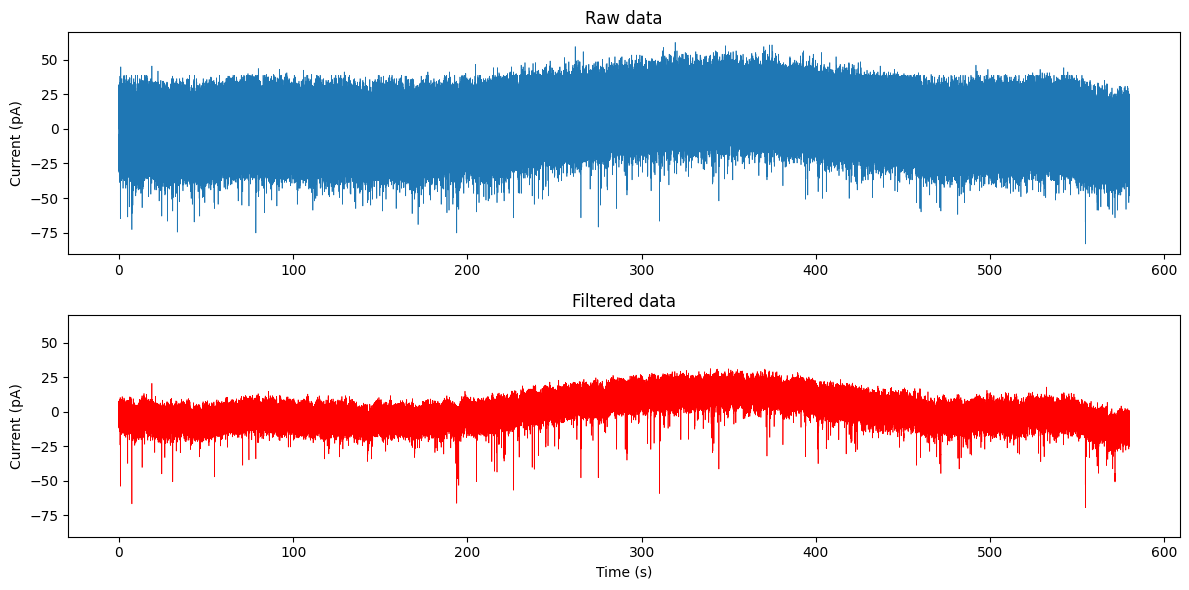

Standard deviation of the trace: 8.709216103233032


In [ ]:
abffile = '24427015.abf'
group = 'Cell 03'
cellName = abffile[0:-4]


tinitial = 20
tfinal = 600 # s

current, time, fs, sweepLabelX, sweepLabelY = load_Voltage(group,abffile,tinitial,tfinal)
current_filtered =  filterdata(current, fs, showtraces=True)

ABF (v2.0) with 2 channels (pA, pA), sampled at 20.0 kHz, containing 1 sweep, having no tags, with a total length of 0.17 minutes, recorded with protocol "GAP-Free_5 min".
FILE: Cell 03/24427015.abf  RECORD TIME = 619.0500 seconds  LOADING = 120.0000 seconds [ 20.0000, 140.0000]


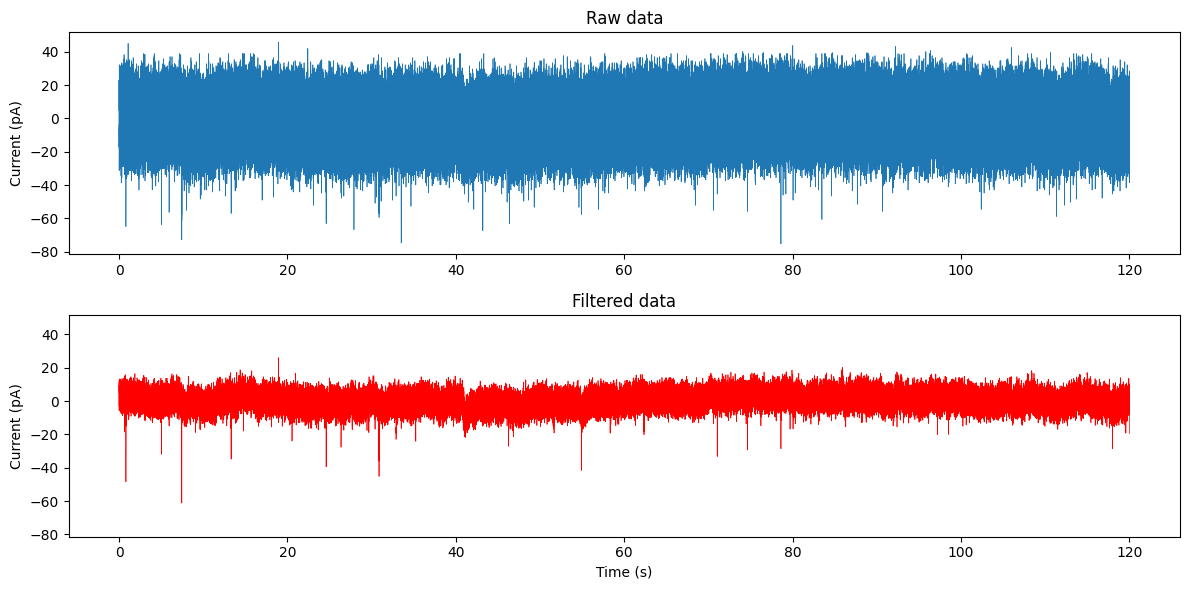

Standard deviation of the trace: 4.371589018551334


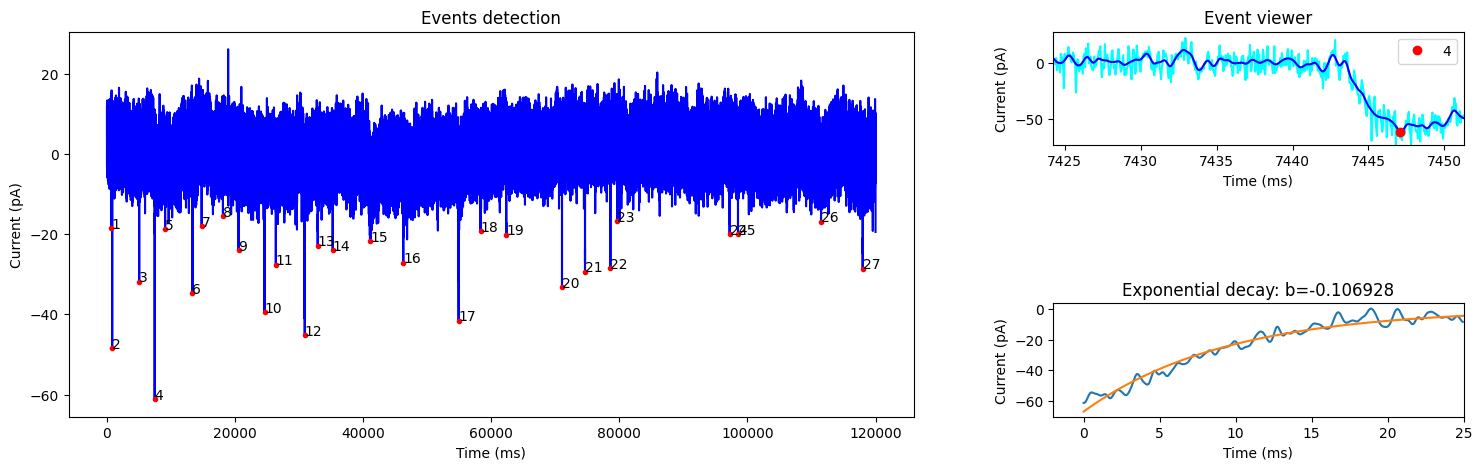

Cell 03/PSP_24427015
ABF (v2.0) with 2 channels (pA, pA), sampled at 20.0 kHz, containing 1 sweep, having no tags, with a total length of 0.17 minutes, recorded with protocol "GAP-Free_5 min".
FILE: Cell 03/24427015.abf  RECORD TIME = 619.0500 seconds  LOADING = 120.0000 seconds [ 180.0000, 300.0000]


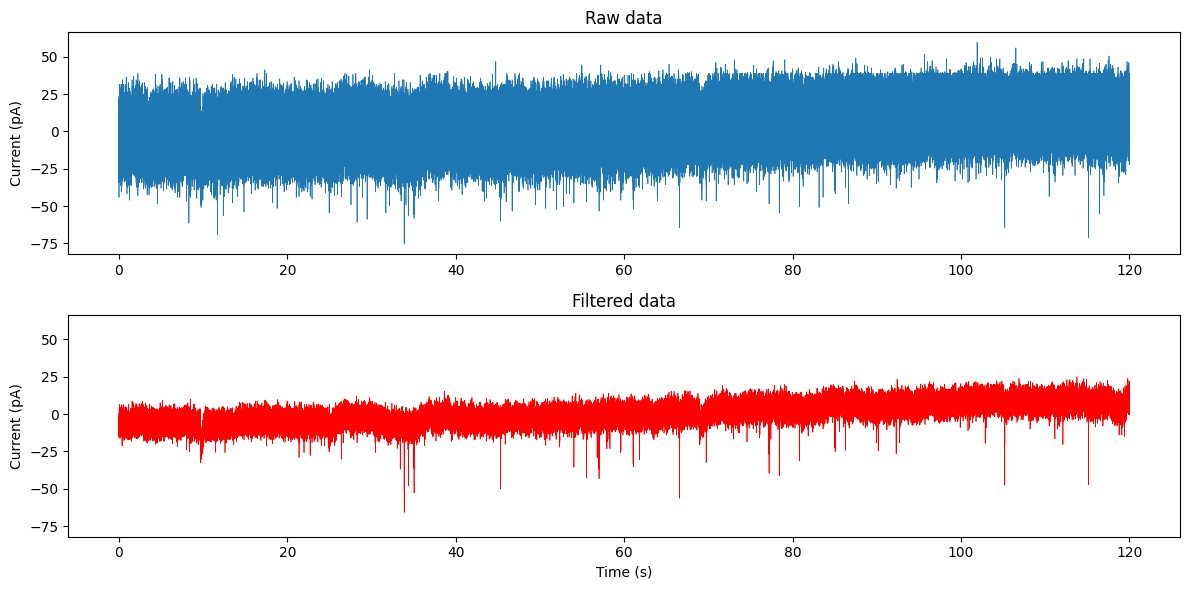

Standard deviation of the trace: 6.795670356397174


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


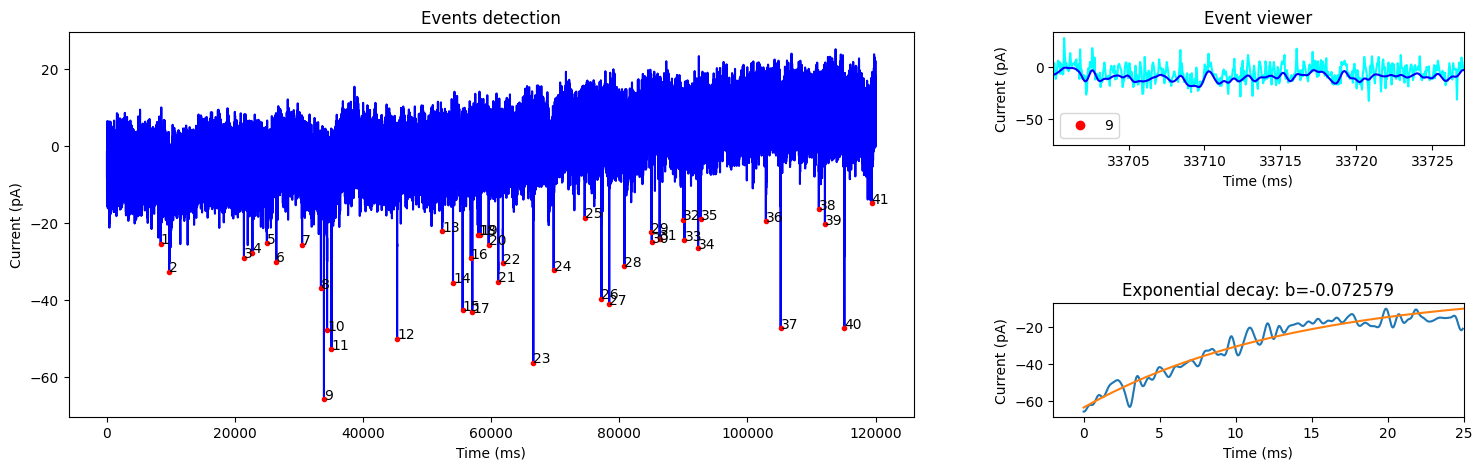

<ipython-input-13-76c1a05ed0f1>:210: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(rfilename + '.png', dpi=300)


Cell 03/PSP_24427015
ABF (v2.0) with 2 channels (pA, pA), sampled at 20.0 kHz, containing 1 sweep, having no tags, with a total length of 0.17 minutes, recorded with protocol "GAP-Free_5 min".
FILE: Cell 03/24427015.abf  RECORD TIME = 619.0500 seconds  LOADING = 120.0000 seconds [ 350.0000, 470.0000]


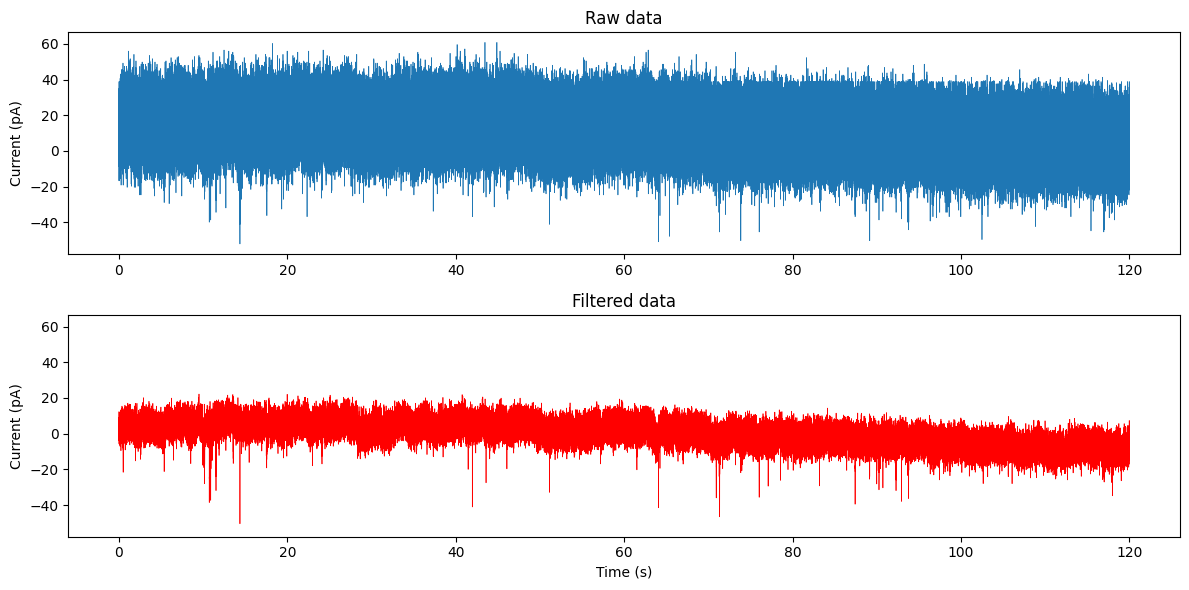

Standard deviation of the trace: 6.4283724751510025


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


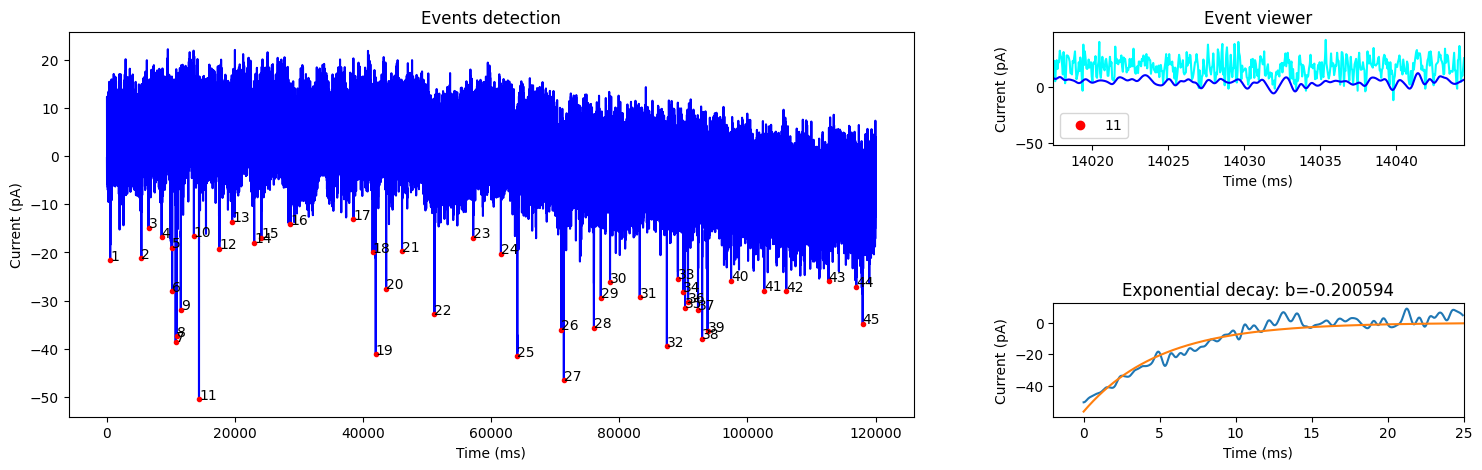

<ipython-input-13-76c1a05ed0f1>:210: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(rfilename + '.png', dpi=300)


Cell 03/PSP_24427015
     event  peak_position  peak_position_s   event_start     event_end  \
0        1          12970          0.64850  1.248819e+04  1.579473e+04   
1        2          16328          0.81640  1.586134e+04  1.929553e+04   
2        3         100760          5.03800  1.002931e+05  1.037328e+05   
3        4         148942          7.44710  1.484851e+05  1.519376e+05   
4        5         181666          9.08330  1.812170e+05  1.844952e+05   
..     ...            ...              ...           ...           ...   
108     41        2052558        102.62790  2.045443e+06  2.062031e+06   
109     42        2121201        106.06005  2.114119e+06  2.130758e+06   
110     43        2253135        112.65675  2.246081e+06  2.262609e+06   
111     44        2339815        116.99075  2.332771e+06  2.349386e+06   
112     45        2359828        117.99140  2.352783e+06  2.369473e+06   

     Peak_Amp_pA   Width_ms    isi_s Area_pA_ms   tau_exp  rise_half_amp_ms  \
0      18.4

In [ ]:
abffile = '24427015.abf'
group = 'Cell 03'
cellName = abffile[0:-4]

# Define as épocas como uma lista de tuplas (tempo_inicial, tempo_final)
epochs = [
    (20, 140),   # Primeira época: 60s a 70s
    (180, 300), # Segunda época: 120s a 130s
    (350, 470)  # Terceira época: 180s a 190s
]

tables = {}
for i, (tinitial, tfinal) in enumerate(epochs, 1):
    current, time, fs, sweepLabelX, sweepLabelY = load_Voltage(group, abffile, tinitial, tfinal)
    current_filtered = filterdata(current, fs, showtraces=True)

    table = detectionPSP(cellName, abffile, group, current_filtered, fs, tinitial, tfinal, current, showtraces=True)
    tables[f'epoch_{i}'] = table

tablelist = list(tables.keys())

def concatenate_tables(table1, table2):
    return pd.concat([table1, table2], ignore_index=True)

combined_table = tables['epoch_1']
for i in range(2, len(tablelist) + 1):
    tablename_A = f'epoch_{i}'
    combined_table = concatenate_tables(combined_table, tables[tablename_A])

print(combined_table)

ABF (v2.0) with 2 channels (pA, mV), sampled at 20.0 kHz, containing 1 sweep, having no tags, with a total length of 0.17 minutes, recorded with protocol "GAP-Free_5 min".
FILE: Cell 02/24426062.abf  RECORD TIME = 182.4500 seconds  LOADING = 10.0000 seconds [ 60.0000, 70.0000]


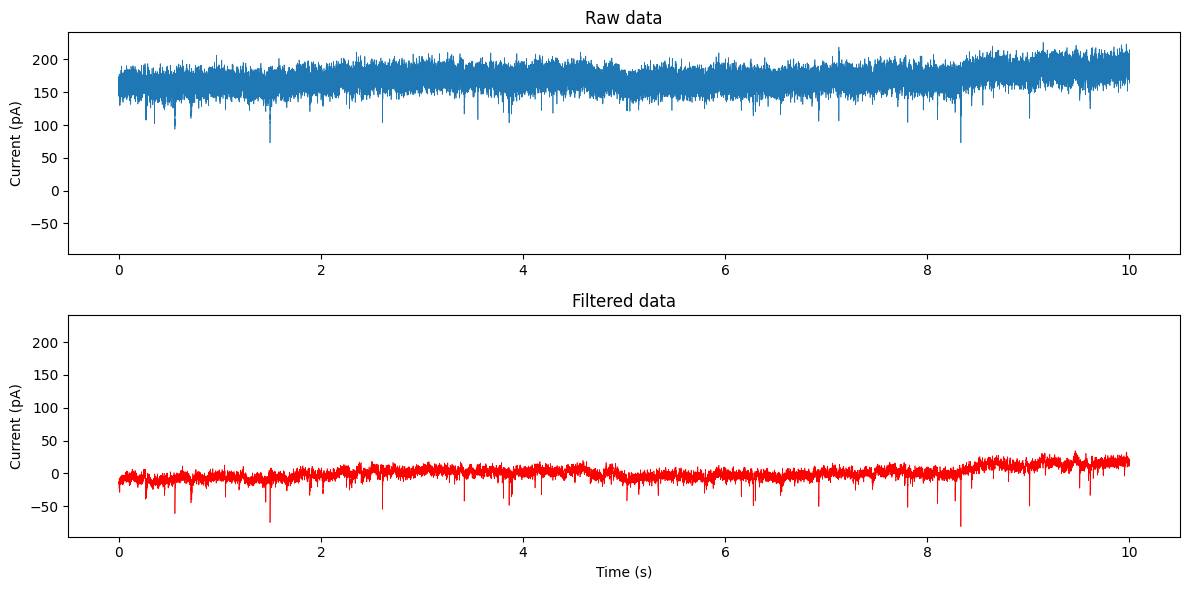

Standard deviation of the trace: 9.31260423941781


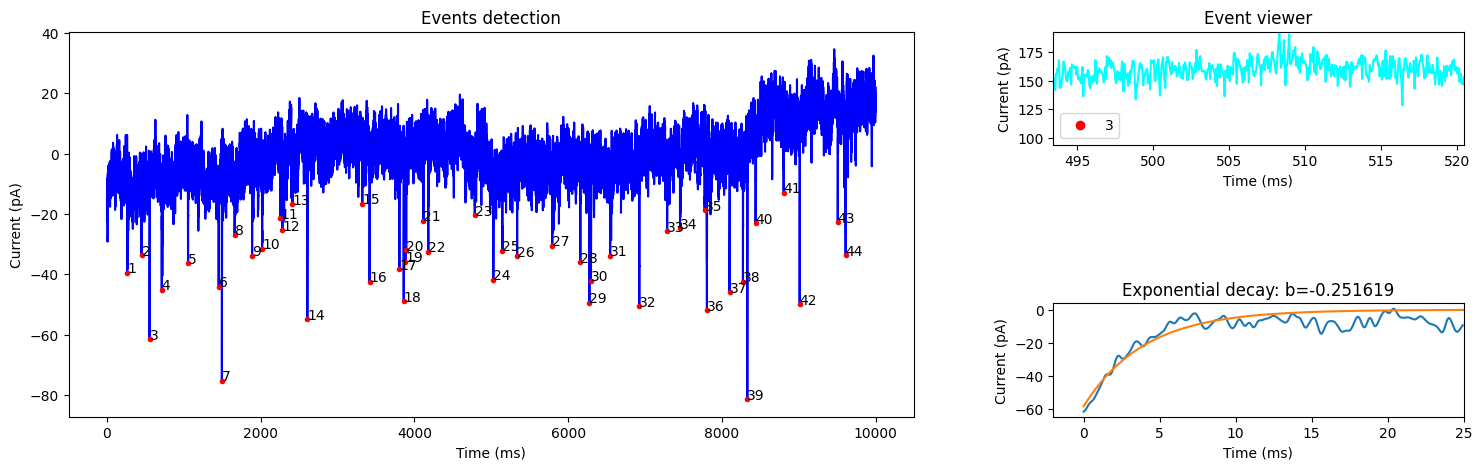

Cell 02/PSP_24426062


In [ ]:
abffile = '24426062.abf'
group = 'Cell 02'
cellName = abffile[0:-4]


tinitial = 60
tfinal = 70 # s

current, time, fs, sweepLabelX, sweepLabelY = load_Voltage(group,abffile,tinitial,tfinal)
current_filtered =  filterdata(current, fs, showtraces=True)

table = detectionPSP(cellName,abffile,group,current_filtered,fs,tinitial,tfinal,current, showtraces=True)

# tables['epoch_1'] = table # mudar o número para cada época
# tables['epoch_2'] = table
tables['epoch_3'] = table

In [ ]:
tablelist = list(tables.keys())

In [ ]:
def concatenate_tables(table1, table2):
  return pd.concat([table1, table2], ignore_index=True)

combined_table = concatenate_tables(tables['epoch_1'], tables['epoch_2'])

for i in range(2, len(tablelist)):

  print(tablelist[i])

  tablename_A = tablelist[i]
  combined_table = concatenate_tables(combined_table, tables[tablename_A])


TypeError: concatenate_tables() takes 2 positional arguments but 3 were given

In [ ]:
table = combined_table
table

,event,peak_position,peak_position_s,event_start,event_end,Peak_Amp_pA,Width_ms,isi_s,Area_pA_ms,tau_exp,rise_half_amp_ms,decay_half_amp_ms
0,1,12970,0.64850,1.248819e+04,1.579473e+04,18.494524,5.327313,0.00000,433.415,0.282869,4.090576,1.236737
1,2,16328,0.81640,1.586134e+04,1.929553e+04,48.383401,11.709167,0.16790,253.945,0.115731,3.332800,8.376367
2,3,100760,5.03800,1.002931e+05,1.037328e+05,31.873257,11.983277,4.22160,237.295,0.146354,3.344092,8.639185
3,4,148942,7.44710,1.484851e+05,1.519376e+05,61.154361,12.627308,2.40910,882.895,0.106928,2.845705,9.781603
4,5,181666,9.08330,1.812170e+05,1.844952e+05,18.809232,3.911771,1.63620,199.065,0.030323,2.450782,1.460989
...,...,...,...,...,...,...,...,...,...,...,...,...
108,41,2052558,102.62790,2.045443e+06,2.062031e+06,27.975024,9.398801,5.18250,5795.23,0.031396,5.772762,3.626039
109,42,2121201,106.06005,2.114119e+06,2.130758e+06,28.023407,11.919092,3.43215,5699.755,0.058675,4.077578,7.841514
110,43,2253135,112.65675,2.246081e+06,2.262609e+06,25.914336,6.382150,6.59670,7032.0,0.024386,2.703329,3.678821
111,44,2339815,116.99075,2.332771e+06,2.349386e+06,27.120512,10.762898,4.33400,8211.365,0.027411,2.195899,8.566999


# •	Peak Amplitude (pA)

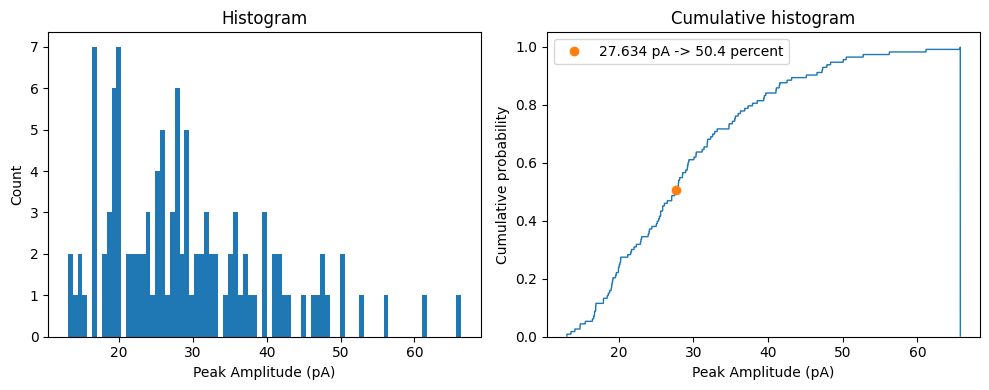


 Values50p = 27.634 pA 

 mean_amplitude = 29.238 pA ± 10.808 pA 

 mean_frequency = 0.942 Hz


In [ ]:
# Sampling rate (Hz)
sampling_rate = fs

# Plot settings
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plot the histogram
#################################
w=max(table.Peak_Amp_pA)/10000 # Bin size for the histograms
#################################
ax1.hist(table.Peak_Amp_pA, bins=np.arange(min(table.Peak_Amp_pA),
                                           max(table.Peak_Amp_pA) + 100*w, 100*w))
ax1.set_title('Histogram')
ax1.set_ylabel("Count")
ax1.set_xlabel("Peak Amplitude (pA)")

# Cumulative histogram
Peak_pA = ax2.hist(table.Peak_Amp_pA, bins=np.arange(min(table.Peak_Amp_pA),
                                           max(table.Peak_Amp_pA) + w, w),
         density=True, histtype='step', cumulative=True)
ax2.set_title('Cumulative histogram')
ax2.set_ylabel("Cumulative probability")
ax2.set_xlabel("Peak Amplitude (pA)")
v50p = np.where(Peak_pA[0]>0.5)[0][0]
plt.plot(Peak_pA[1][v50p],Peak_pA[0][v50p],'o',label ='%.3f pA -> %.1f percent' % (Peak_pA[1][v50p],100*Peak_pA[0][v50p]))
plt.legend()
fig.tight_layout()
plt.show()

print("\n Values50p = %.3f pA \n" % Peak_pA[1][v50p])

# Summary statistics
time_s = len(time)/sampling_rate
events = len(table.event)
mean_frequency = events/time_s
mean_amplitude = np.average(table.Peak_Amp_pA)
std_amplitude = np.std (table.Peak_Amp_pA)
print (" mean_amplitude = %.3f pA ± %.3f pA \n" % (mean_amplitude, std_amplitude))
print (" mean_frequency = %.3f Hz" % mean_frequency)



# •	Inter-event interval (s)

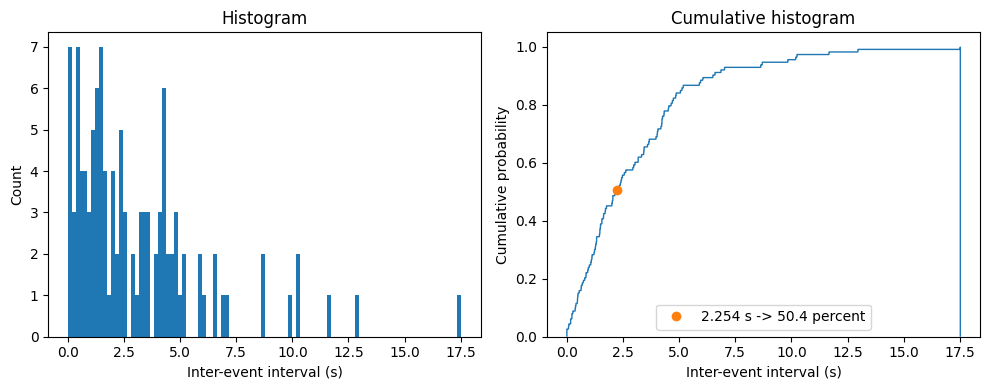


 Values50p = 2.254 s 

 mean ISI = 3.060 s ± 2.952 s 

 mean_frequency = 0.942 Hz


In [ ]:
# Sampling rate (Hz)
sampling_rate = fs

# Plot settings
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plot the histogram
#################################
w=max(table.isi_s)/100000 # Bin size for the histograms
#################################
ax1.hist(table.isi_s, bins=np.arange(min(table.isi_s),
                                           max(table.isi_s) + 1000*w, 1000*w))
ax1.set_title('Histogram')
ax1.set_ylabel("Count")
ax1.set_xlabel("Inter-event interval (s)")

# Cumulative histogram
ISI_s = ax2.hist(table.isi_s, bins=np.arange(min(table.isi_s),
                                           max(table.isi_s) + w, w),
         density=True, histtype='step', cumulative=True)
ax2.set_title('Cumulative histogram')
ax2.set_ylabel("Cumulative probability")
ax2.set_xlabel("Inter-event interval (s)")
v50p = np.where(ISI_s[0]>0.5)[0][0]
plt.plot(ISI_s[1][v50p],ISI_s[0][v50p],'o',label ='%.3f s -> %.1f percent' % (ISI_s[1][v50p],100*ISI_s[0][v50p]))
plt.legend()
fig.tight_layout()
plt.show()

print("\n Values50p = %.3f s \n" % ISI_s[1][v50p])

# Summary statistics
time_s = len(time)/sampling_rate
events = len(table.event)
mean_frequency = events/time_s
mean_amplitude = np.average(table.isi_s)
std_amplitude = np.std (table.isi_s)
print (" mean ISI = %.3f s ± %.3f s \n" % (mean_amplitude, std_amplitude))
print (" mean_frequency = %.3f Hz" % mean_frequency)


# •	Max-rise slope (pA/ms)

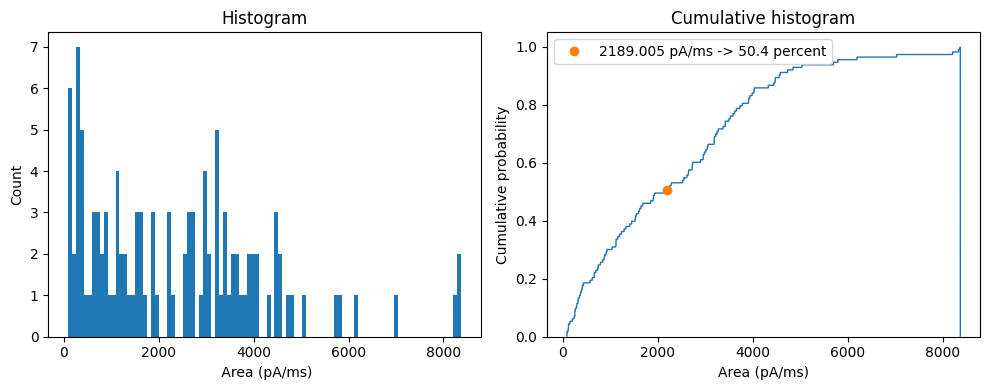


 Values50p = 2189.005 pA/ms 

 mean Area = 2376.489 pA/ms ± 1870.149 pA/ms 

 mean_frequency = 0.942 Hz


In [ ]:
# Sampling rate (Hz)
sampling_rate = fs

# Plot settings
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plot the histogram
#################################
w=max(table.Area_pA_ms)/10000 # Bin size for the histograms
#################################
ax1.hist(table.Area_pA_ms, bins=np.arange(min(table.Area_pA_ms),
                                           max(table.Area_pA_ms) + 100*w, 100*w))
ax1.set_title('Histogram')
ax1.set_ylabel("Count")
ax1.set_xlabel(" Area (pA/ms)")

# Cumulative histogram
Peak_pA = ax2.hist(table.Area_pA_ms, bins=np.arange(min(table.Area_pA_ms),
                                           max(table.Area_pA_ms) + w, w),
         density=True, histtype='step', cumulative=True)
ax2.set_title('Cumulative histogram')
ax2.set_ylabel("Cumulative probability")
ax2.set_xlabel("Area (pA/ms)")
v50p = np.where(Peak_pA[0]>0.5)[0][0]
plt.plot(Peak_pA[1][v50p],Peak_pA[0][v50p],'o',label ='%.3f pA/ms -> %.1f percent' % (Peak_pA[1][v50p],100*Peak_pA[0][v50p]))
plt.legend()
fig.tight_layout()
plt.show()

print("\n Values50p = %.3f pA/ms \n" % Peak_pA[1][v50p])

# Summary statistics
time_s = len(time)/sampling_rate
events = len(table.event)
mean_frequency = events/time_s
mean_amplitude = np.average(table.Area_pA_ms)
std_amplitude = np.std (table.Area_pA_ms)
print (" mean Area = %.3f pA/ms ± %.3f pA/ms \n" % (mean_amplitude, std_amplitude))
print (" mean_frequency = %.3f Hz" % mean_frequency)


# Width_ms (ms)

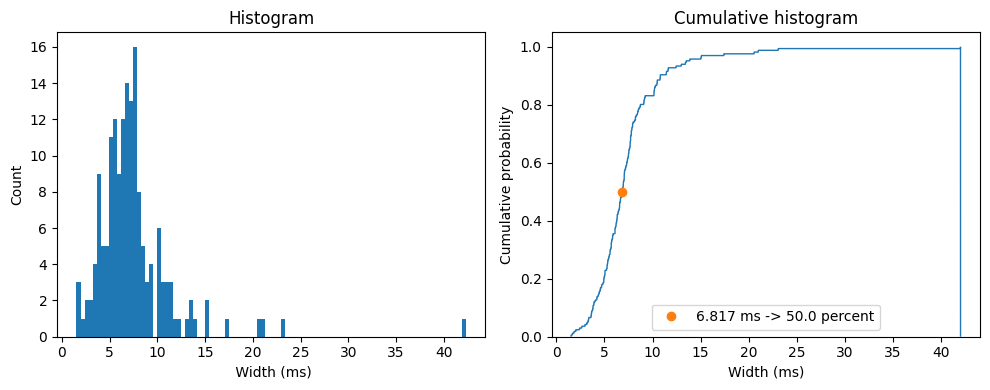


 Values50p = 6.817 ms 

 mean Width = 7.442 ms ± 4.263 ms 

 mean_frequency = 0.922 Hz


In [ ]:
# Sampling rate (Hz)
sampling_rate = fs

# Plot settings
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plot the histogram
#################################
w=max(table.Width_ms)/10000 # Bin size for the histograms
#################################
ax1.hist(table.Width_ms, bins=np.arange(min(table.Width_ms),
                                           max(table.Width_ms) + 100*w, 100*w))
ax1.set_title('Histogram')
ax1.set_ylabel("Count")
ax1.set_xlabel(" Width (ms)")

# Cumulative histogram
Peak_pA = ax2.hist(table.Width_ms, bins=np.arange(min(table.Width_ms),
                                           max(table.Width_ms) + w, w),
         density=True, histtype='step', cumulative=True)
ax2.set_title('Cumulative histogram')
ax2.set_ylabel("Cumulative probability")
ax2.set_xlabel("Width (ms)")
v50p = np.where(Peak_pA[0]>0.5)[0][0]
plt.plot(Peak_pA[1][v50p],Peak_pA[0][v50p],'o',label ='%.3f ms -> %.1f percent' % (Peak_pA[1][v50p],100*Peak_pA[0][v50p]))
plt.legend()
fig.tight_layout()
plt.show()

print("\n Values50p = %.3f ms \n" % Peak_pA[1][v50p])

# Summary statistics
time_s = len(time)/sampling_rate
events = len(table.event)
mean_frequency = events/time_s
mean_amplitude = np.average(table.Width_ms)
std_amplitude = np.std (table.Width_ms)
print (" mean Width = %.3f ms ± %.3f ms \n" % (mean_amplitude, std_amplitude))
print (" mean_frequency = %.3f Hz" % mean_frequency)


# tau_exp

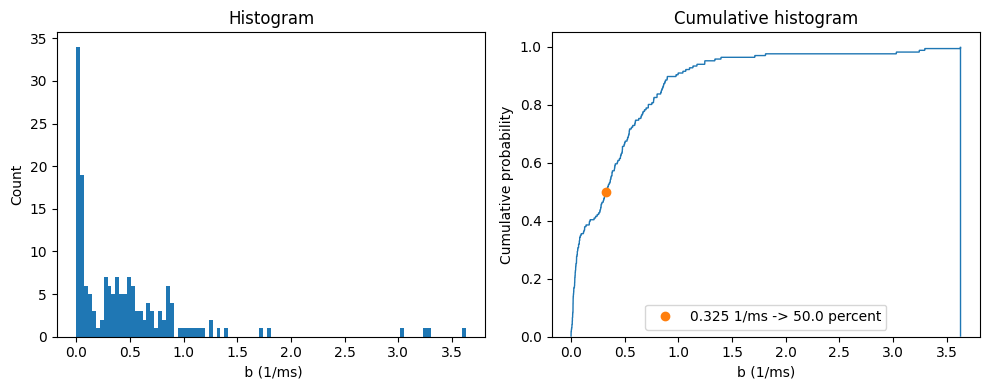


 Values50p = 0.325 1/ms 

 mean b = 0.455 1/ms ± 0.583 1/ms 

 mean_frequency = 0.922 Hz


In [ ]:
# Sampling rate (Hz)
sampling_rate = fs

# Plot settings
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Plot the histogram
#################################
w=max(table.tau_exp)/10000 # Bin size for the histogra1/ms
#################################
ax1.hist(table.tau_exp, bins=np.arange(min(table.tau_exp),
                                           max(table.tau_exp) + 100*w, 100*w))
ax1.set_title('Histogram')
ax1.set_ylabel("Count")
ax1.set_xlabel(" b (1/ms)")

# Cumulative histogram
Peak_pA = ax2.hist(table.tau_exp, bins=np.arange(min(table.tau_exp),
                                           max(table.tau_exp) + w, w),
         density=True, histtype='step', cumulative=True)
ax2.set_title('Cumulative histogram')
ax2.set_ylabel("Cumulative probability")
ax2.set_xlabel("b (1/ms)")
v50p = np.where(Peak_pA[0]>0.5)[0][0]
plt.plot(Peak_pA[1][v50p],Peak_pA[0][v50p],'o',label ='%.3f 1/ms -> %.1f percent' % (Peak_pA[1][v50p],100*Peak_pA[0][v50p]))
plt.legend()
fig.tight_layout()
plt.show()

print("\n Values50p = %.3f 1/ms \n" % Peak_pA[1][v50p])

# Summary statistics
time_s = len(time)/sampling_rate
events = len(table.event)
mean_frequency = events/time_s
mean_amplitude = np.average(table.tau_exp)
std_amplitude = np.std (table.tau_exp)
print (" mean b = %.3f 1/ms ± %.3f 1/ms \n" % (mean_amplitude, std_amplitude))
print (" mean_frequency = %.3f Hz" % mean_frequency)
